
# Este Notebook calcula los errores asociados con el Trabajo de Grado



In [ ]:
# Cargamos los paquetes
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import scipy.stats as stats
from astropy.visualization import hist

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Definimos las constantes
kpc_to_km = 3.0857e16 #km
M_sun = 1.9885e30 #1.9891e30 #kg
km_to_m = 1e3 #m
yr_to_s = 3.1536e7 #s
Gyr_s = yr_to_s*1e9 #s

# Unidades canónicas
ul= 1.0 #kpc
um= (1.0e0) # M_Sun
uv = 1 #km/s
ut = ul*kpc_to_km/(uv*Gyr_s) #Gyr
ut_y1 = (ut/yr_to_s) #Myr
ut_y = (ut/yr_to_s)/1e6

#Deduccion unidades G
G_ini = 6.674e-11 #m^3/(kg.s^2)

Gkm = G_ini / (km_to_m)**3  #km³ / (kg * s²)
G1 = (Gkm /kpc_to_km) * M_sun    # (kpc/M_sun) (km/s)²

G2 = (G1/ul*uv)*um #Este es el valor de G que usamos en el script

G2 = (G1/ul*uv)*um #Este es el valor de G que usamos en el script
print('G en unidades canónicas es',format(G2,'.1E'),'(ul/um) (uv)²' )
print(format(ut,'.5E'))
print(format(ut_y1,'.5E'))
print('ut es','{0:.3f}'.format(ut),'Gyr')

G en unidades canónicas es 4.3E-06 (ul/um) (uv)²
9.78469E-01
3.10271E-08
ut es 0.978 Gyr


## Primero traemos la BD con la información del radio de la estrella y la gravedad superficial de la estrella, para calcular el error de la Masa de las estrellas

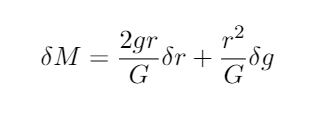

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos_error_mass = pd.read_csv('/content/drive/MyDrive/ASTRONOMÍA/Seminario_Trabajo_Grado_HVS/HVS_con_masa.csv', sep=',') 

In [ ]:
#Con esta línea sacamos los dos valores atípicos encontrados para las masas de las 26 estrellas. Por tanto quedan 24
out = datos_error_mass.drop([datos_error_mass.index[1],datos_error_mass.index[6]])

In [ ]:
out

,Unnamed: 0,Unnamed: 0.1,Gaia_designation,ID,specid,R.A.,e_R.A.,decl.,e_decl.,S/N_r,...,e_[Fe/H]_DD-Payne,Alpha_Fe_DD-Payne,e_Alpha_Fe_DD-Payne,conservative_results,radial_velocity,radius_val,radius_percentile_lower,radius_percentile_upper,Masas,Masas_M_sun
0,184,184,4552754742098901504,Hivel185,20160418HD175440N181108V0111132_v2.9.7,268.297715,0.0154,20.538730,0.0211,86,...,0.06,0.28,0.03,1,NaN,10.413774,9.799208,11.016633,1.334825e+30,0.671272
2,253,253,4557012394719359616,Hivel254,20170416HD172149N234110V0106117_v2.9.7,262.768439,0.0071,22.495683,0.0102,155,...,0.05,0.24,0.02,1,NaN,11.717733,8.692535,14.620147,1.613969e+30,0.811652
3,264,264,4410589469176268416,Hivel265,20130310HD155427N020832B0102074_v2.9.7,237.805691,0.0249,0.402692,0.0178,20,...,0.34,-0.05,0.15,0,17.799652,16.477581,15.392542,17.584579,6.982243e+29,0.351131
4,288,288,1239855357825463424,Hivel289,20150210HD141904N190355B0209220_v2.9.7,215.507573,0.0190,19.602365,0.0230,86,...,0.07,0.26,0.03,1,NaN,3.221900,3.023561,3.564584,2.272124e+30,1.142632
5,307,307,1247482768771074432,Hivel308,20170523HD135706N205714B0113173_v2.9.7,210.887254,0.0433,21.729036,0.0428,32,...,0.12,0.30,0.07,0,NaN,1.005400,0.889974,1.160814,1.188189e+30,0.597531
7,344,344,3698771035828394368,Hivel345,20120215F559730609031_v2.9.7,182.625200,0.0302,-0.002216,0.0223,70,...,0.08,0.21,0.04,1,NaN,1.462444,1.359428,1.618227,1.699678e+30,0.854754
8,384,384,1267516459040509056,Hivel385,20130214HD144325N263140F0108173_v2.9.7,221.487724,0.0330,25.875947,0.0335,37,...,0.12,0.17,0.09,1,NaN,1.045916,0.942005,1.206911,1.346485e+30,0.677136
9,417,417,1477370691426238720,Hivel418,20170402HD141746N331518M0201110_v2.9.7,214.903523,0.0291,31.377989,0.0311,106,...,0.03,0.21,0.03,0,NaN,1.889042,1.622278,2.074840,2.835904e+30,1.426152
10,437,437,1277487174079395584,Hivel438,20170417HD152148N325601B0206133_v2.9.7,232.966051,0.0302,32.492866,0.0548,18,...,0.14,0.27,0.09,0,NaN,1.119215,0.993168,1.236086,2.500549e+30,1.257505
11,459,459,1285140492266249216,Hivel460,20160515HD142214N292211V0215225_v2.9.7,215.419657,0.0168,30.859244,0.0168,221,...,0.05,0.25,0.02,0,-155.268108,14.127474,12.934199,15.100599,3.164733e+30,1.591518


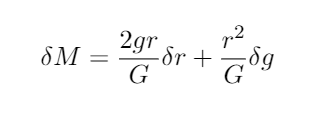

In [ ]:
#Definimos G para la masa y el radio del Sol
G = 6.674e-11 #m^3/(kg.s^2)
R_sun = 1.391e9/2.0 #m
M_sun = 1.9885e30 #kg

In [ ]:
#Error de la gravedad superficial
delta_g = (10**(out['e_log(g)_LASP']))/100

In [ ]:
#Errores del radio de la estrella
delta_r_inf = (out['radius_val'] - out['radius_percentile_lower'])*R_sun # Pasamos el radio a m
delta_r_sup = (out['radius_percentile_upper']-out['radius_val'])*R_sun # Pasamos el radio a m

## Ahora operamos con log(g) donde g está en $cm/s^2$. Debemos sacar a g del log en base 10 y luego escribirla en $m/s^2$

In [ ]:
grav2 = (10**out['log(g)_LASP']) #sacamos antilog
gravedad_estrella = grav2/100 #queda en m/s^2
Radios_sun = out['radius_val']*R_sun # Pasamos el radio a m

##Tenemos todo para aplicar la fórmula del error de la masa y luego correr las gráficas con el error

In [ ]:
error_Masa_inferior = (2*gravedad_estrella*Radios_sun*delta_r_inf + delta_g*Radios_sun**2)/G
error_Masa_superior = (2*gravedad_estrella*Radios_sun*delta_r_sup + delta_g*Radios_sun**2)/G

In [ ]:
#PAsamos errores a masas solares
err_Mas_inf_Msun = error_Masa_inferior/M_sun
err_Mas_sup_Msun = error_Masa_superior/M_sun

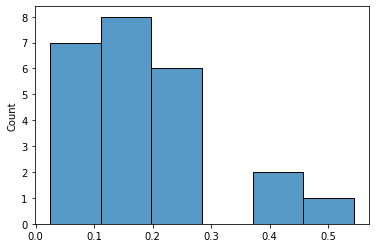

In [ ]:
sns.histplot(x=err_Mas_inf_Msun)

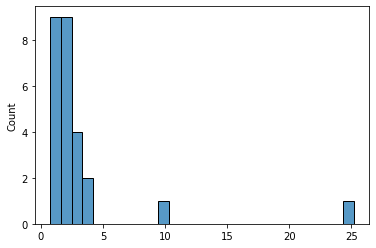

Sacamos los dos datos de masas con valores extremos para su tipo espectral (HiVel230 y HiVel310) puesto que poseen masas de 11.97 $M_{\odot}$ y 4.43 $M_{\odot}$ las cuales no concuerdan con las de una estrella tipo F5, que tienen asignada de acuerdo con Gaia.

In [ ]:
# Función para graficar los errores de la masa estelar
def err_gra_masa(datos):
  x= [i for i in range(len(datos))] 
  y= datos
  fig, ax = plt.subplots(figsize=(10, 10))
  plt.axhline(np.mean(datos),color='k',linestyle="--", label = 'media')
  plt.plot(x,y,color='m', ls = "-", label='masa calculada en $M_{\odot}$')
  plt.fill_between(x, (datos - err_Mas_inf_Msun), datos + err_Mas_sup_Msun, color='gray', ls = '-.',lw= 3,alpha=0.3,edgecolor='black', label = 'Error en $M_{\odot}$')
  plt.xlim(0,25)
  plt.ylim(0,40)
  plt.savefig('/content/drive/MyDrive/ASTRONOMÍA/Seminario_Trabajo_Grado_HVS/Jupiter/Archivos_errores/Errores_masa_Estrellas.png')
  #dispersion = ax.scatter(x, y,s = 1, color='orange', label='Tiempo adaptativo (h)')
  plt.legend()

Gráfica anterior

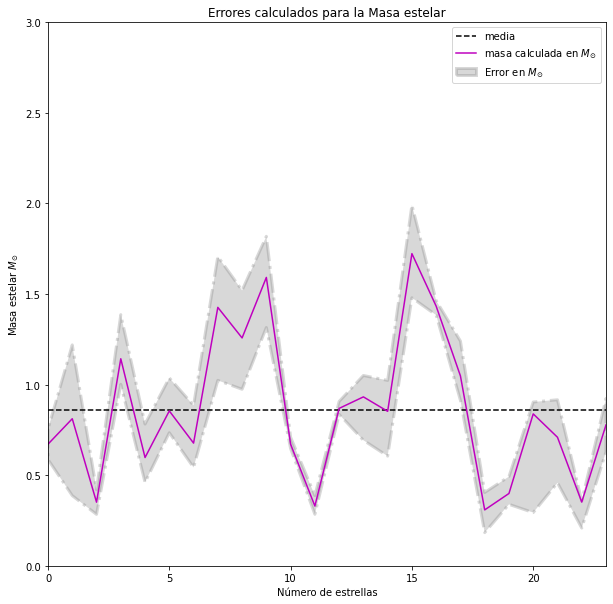

In [ ]:
# Acá se llama la función que grafica los errores de las masas estelares y las guardamos
err_gra_masa(out['Masas_M_sun'])
plt.title('Errores calculados para la Masa estelar')
plt.xlabel('Número de estrellas')
plt.ylabel('Masa estelar $M_{\odot}$')
plt.savefig("Masa_error_24_stars.png")
plt.xlim(0,23)
plt.ylim(0,3)
plt.show()

In [ ]:
from numpy.ma.core import size
from matplotlib import markers
#Otra manera de mostrar los errores

def err_barr_gra_masa(datos): #otra función para graficar los errores de las masas estelares
  x= [i for i in range(len(datos))] 
  y= datos
  fig, ax = plt.subplots(figsize=(8, 7))
  ax.scatter(x, y,s = 30,marker="*", color='m',label='masa calculada en $M_{\odot}$')
  plt.axhline(np.mean(datos),color='crimson',linestyle="--", label = 'media')
  plt.errorbar(x, datos, yerr= [err_Mas_inf_Msun, err_Mas_sup_Msun],linestyle='none', color='k', label='Error asociado')
  plt.xlim(0,25)
  plt.ylim(0,3.5)
  plt.savefig('/content/drive/MyDrive/ASTRONOMÍA/Seminario_Trabajo_Grado_HVS/Jupiter/Archivos_errores/Errores_masa_Estrellas.png')
  
  plt.legend()

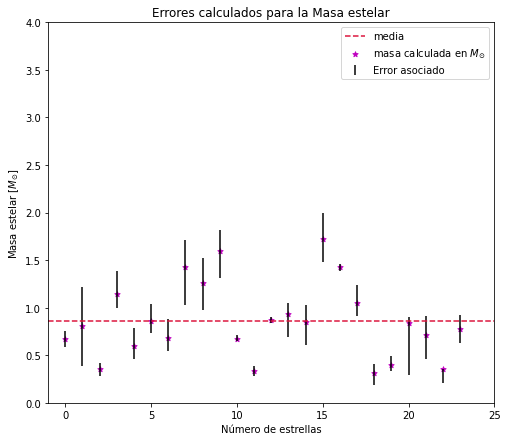

In [ ]:
# Acá se llama la segunda función
err_barr_gra_masa(out['Masas_M_sun'])
plt.title('Errores calculados para la Masa estelar')
plt.xlabel('Número de estrellas')
plt.ylabel('Masa estelar [$M_{\odot}$]')
plt.savefig("Masa_error_2_24_stars.png")
plt.xlim(-1,25)
plt.ylim(0,4.0)
plt.show()

In [ ]:
#Incluimos los errores en el dataset
out['err_Mas_inf_Msun']= err_Mas_inf_Msun # Error en el calculo de las masas de las estrellas inferior
out['err_Mas_sup_Msun']= err_Mas_sup_Msun # Error en el calculo de las masas de las estrellas superior

out['delta_g']= delta_g # Error en el calculo de las masas de las estrellas superior

In [ ]:
out.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Gaia_designation', 'ID', 'specid',
       'R.A.', 'e_R.A.', 'decl.', 'e_decl.', 'S/N_r',
       ...
       'conservative_results', 'radial_velocity', 'radius_val',
       'radius_percentile_lower', 'radius_percentile_upper', 'Masas',
       'Masas_M_sun', 'err_Mas_inf_Msun', 'err_Mas_sup_Msun', 'delta_g'],
      dtype='object', length=104)

## Sacamos la tabla con las estrellas y sus masas LI, M y LS en LateX

In [ ]:
out['Masas_LI'] = out['Masas_M_sun']-out['err_Mas_inf_Msun']
out['Masas_LS'] = out['Masas_M_sun']+out['err_Mas_sup_Msun']

In [ ]:
print(out['Masas_M_sun'].max(),out['Masas_M_sun'].min(),np.mean(out['Masas_M_sun']))
print(out['Masas_LI'].max(),out['Masas_LI'].min(),np.mean(out['Masas_LI']))
print(out['Masas_LS'].max(),out['Masas_LS'].min(),np.mean(out['Masas_LS']))

1.7228073350225126 0.3085150833287027 0.8593085474387056
1.4791615864967722 0.1829223675285944 0.6774702312291643
1.9912842257316177 0.35768925515466227 1.0125552114070209


In [ ]:
pip install tabulate

In [ ]:
from tabulate import tabulate

In [ ]:
select_table= out[['ID','Masas_LI','Masas_M_sun','Masas_LS']]
print(tabulate(select_table, headers=['ID','Masas_LI','Masas_M_sun','Masas_LS'], tablefmt='latex'))

\begin{tabular}{rlrrr}
\hline
    & ID       &   Masas\_LI &   Masas\_M\_sun &   Masas\_LS \\
\hline
  0 & Hivel185 &   0.58671  &      0.671272 &   0.754325 \\
  2 & Hivel254 &   0.387072 &      0.811652 &   1.21922  \\
  3 & Hivel265 &   0.28373  &      0.351131 &   0.419468 \\
  4 & Hivel289 &   1.00151  &      1.14263  &   1.38614  \\
  5 & Hivel308 &   0.46022  &      0.597531 &   0.782374 \\
  7 & Hivel345 &   0.734234 &      0.854754 &   1.03696  \\
  8 & Hivel385 &   0.542516 &      0.677136 &   0.885669 \\
  9 & Hivel418 &   1.02321  &      1.42615  &   1.70684  \\
 10 & Hivel438 &   0.974155 &      1.25751  &   1.52023  \\
 11 & Hivel460 &   1.31505  &      1.59152  &   1.81839  \\
 12 & Hivel465 &   0.646774 &      0.670956 &   0.70993  \\
 13 & Hivel486 &   0.284169 &      0.32986  &   0.387528 \\
 14 & Hivel487 &   0.835599 &      0.868678 &   0.907153 \\
 15 & Hivel494 &   0.692902 &      0.932221 &   1.05043  \\
 16 & Hivel507 &   0.605275 &      0.852512 &   1.02321  \\

## Agregamos las columnas de errores al dataset con las 26 estrellas evaluadas

In [ ]:
out.to_csv('/content/drive/MyDrive/ASTRONOMÍA/Seminario_Trabajo_Grado_HVS/Jupiter/Archivos_errores/HiVels_24_full.csv', index=False)

## Ahora calculamos los errores para el tiempo adaptativo h de las estrellas con mayor opción de ser HV

In [ ]:
# Primero creamos un DataFrame en el que guardamos nuestas HVS
Star_names = ['Hivel185', 'Hivel254', 'Hivel265','Hivel308', 'Hivel345', 'Hivel385',
 'Hivel418', 'Hivel465', 'Hivel486', 'Hivel487', 'Hivel494', 'Hivel507',
 'Hivel545', 'Hivel549', 'Hivel574', 'Hivel578', 'Hivel582', 'Hivel583']

In [ ]:
Star_n = ['Hivel185', 'Hivel254', 'Hivel265','Hivel308', 'Hivel345', 'Hivel385',
 'Hivel418', 'Hivel465', 'Hivel486', 'Hivel487', 'Hivel494', 'Hivel507',
 'Hivel545', 'Hivel549', 'Hivel574', 'Hivel578', 'Hivel582', 'Hivel583']
df = pd.DataFrame (Star_n, columns = ['ID_Stars'])

In [ ]:
#Acá llamamos una por una de los datos obtenidos en la integración orbital de las estrellas candidatas HVS 
Star_all = {}
for i, j in zip(Star_names,[i for i in range(len(Star_names))]):
  Star_all[str(j)] =  pd.read_csv(f'/content/drive/MyDrive/ASTRONOMÍA/Seminario_Trabajo_Grado_HVS/{i}')

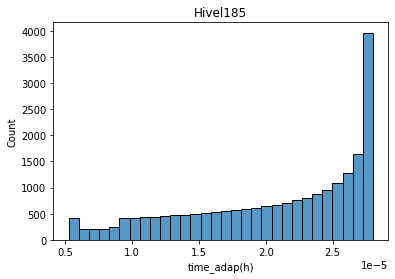

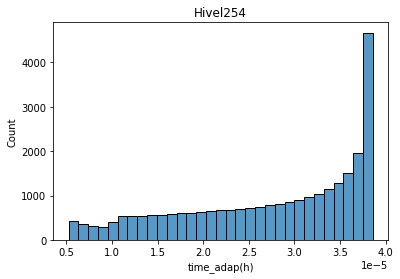

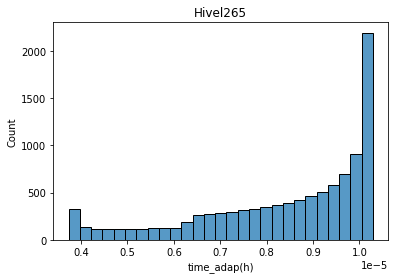

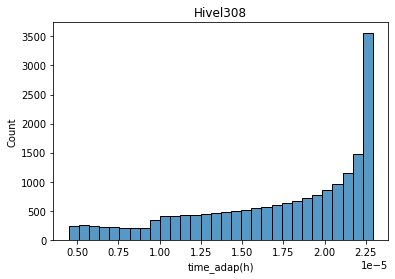

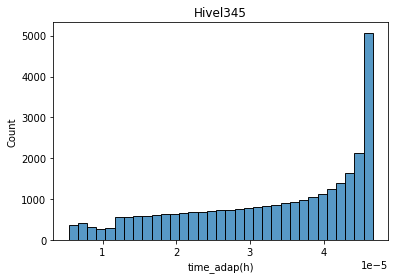

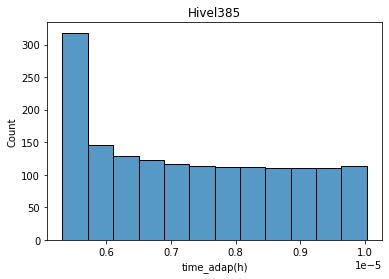

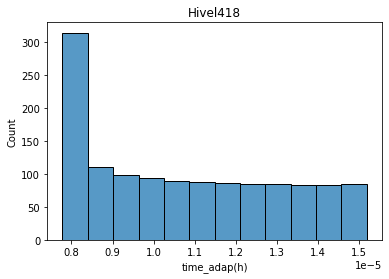

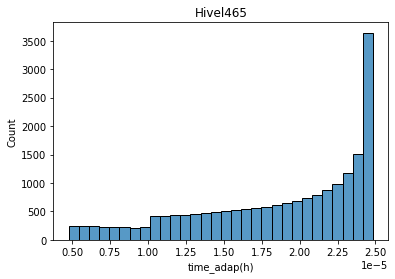

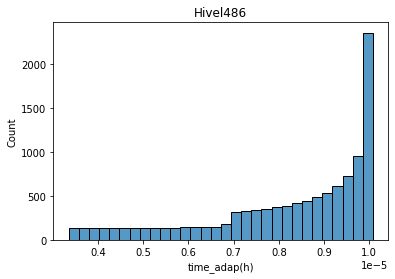

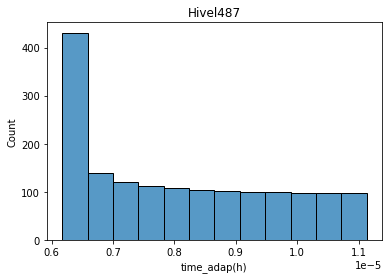

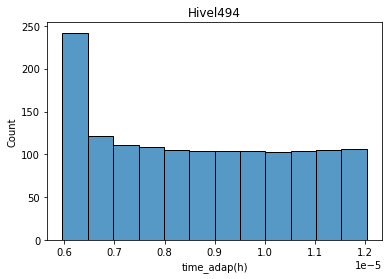

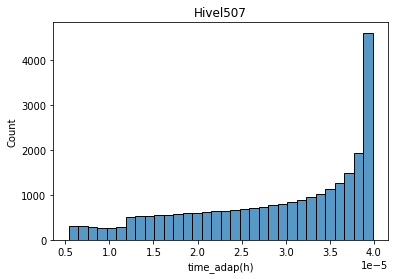

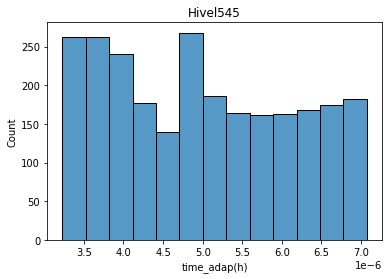

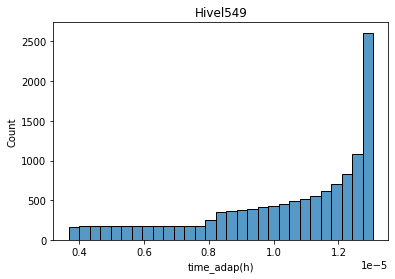

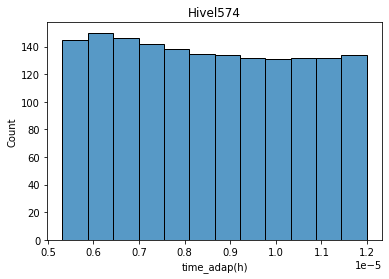

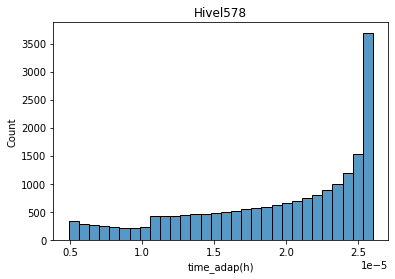

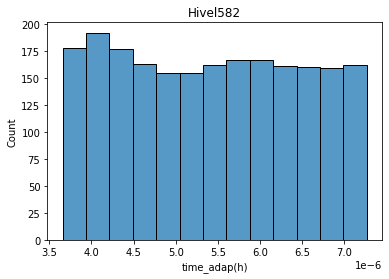

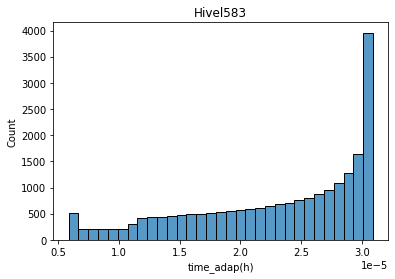

In [ ]:
# Hacemos el histograma de las estrellas para observar su distribución
for i in range(len(Star_names)):
  a = Star_all[f'{i}']['time_adap(h)'][Star_all[f'{i}']['time_adap(h)']> 0.0]
  sns.histplot(data=a)
  plt.title(f"{df.loc[i,'ID_Stars']}")
  plt.show()

# Acá empiezan los cálculos de los errores. Primer método, vía media ponderada

In [ ]:
# Primero
h = Star_all['0']['time_adap(h)'][Star_all['0']['time_adap(h)']> 0.0]
hmax = np.max(h)
hmin = np.min(h)
len(h)

21684

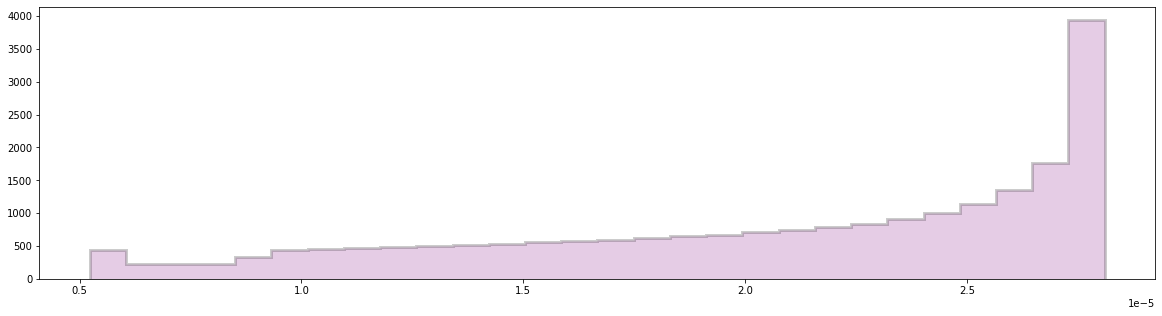

In [ ]:
# Usamos astropy para generar un histograma de frecuencias que nos entregue frecuencia y valor asociado para calcular el peso
from locale import normalize
bins = 'scott' # Astropy.hist pre-selected histogram bins

fig = plt.figure(figsize = [20,5])

hist_out = hist(h, bins=bins, histtype='step',alpha=0.2, density=False, edgecolor='black', linewidth=3, color = 'purple', fill=True)
plt.show()

In [ ]:
# Definimos la función que nos calcula los pesos
def pesos(datos,freq, interv):
  w = []
  freq_max = np.max(freq)
  for i in datos:
    for l in range(len(freq)):
      if i <= interv[l+1] and i > interv[l]:
        w += [freq[l]/freq_max]
      else: continue
    if i == interv[0]:
      w += [freq[0]/freq_max]
  return w 

In [ ]:
# Creamos un arreglo con las frecuencias y los intervalos y obtenemos la media pesada
k = np.array(pesos(h,hist_out[0],hist_out[1]))
weig_media = np.average(h,weights=k)
print(weig_media)

2.4877861972194958e-05


In [ ]:
#Ahora calculamos el error usando los pesos que acabamos de calcular
def error_h(datos):
  hmax = np.max(datos)
  hmin = np.min(datos)
  bins = 'scott' # Astropy.hist pre-selected histogram bins
  hist_out = hist(datos, bins=bins, histtype='step',alpha=0.5, density=False, edgecolor='black', linewidth=4, color = 'purple', fill=True, label='Histograma de frecuencias del tiempo adaptativo (h)')
  k = np.array(pesos(datos,hist_out[0],hist_out[1]))
  weig_media = np.average(datos,weights=k)
  delta_i = datos.values*weig_media/hmax
  x= [i for i in range(len(datos))] 
  y= datos
  fig, ax = plt.subplots(figsize=(8, 6))
  plt.axhline(weig_media,color='k',linestyle="--", label = 'media ponderada')
  plt.fill_between(x, datos - delta_i, datos + delta_i, color='purple', ls = '-.',lw= 3,alpha=0.2,edgecolor='black', label = 'Error tiempo adaptativo (h)')
  plt.xlim(0,len(datos))
  plt.xlabel('número de tiempos adaptativos (h)')
  plt.ylabel('tiempo [Gyr]')
  dispersion = ax.scatter(x, y,s = 1, color='purple', label='Tiempo adaptativo (h)')
  print(hmax,hmin,len(datos))
  plt.legend()

2.803522456377727e-05 5.239932801394977e-06 21684


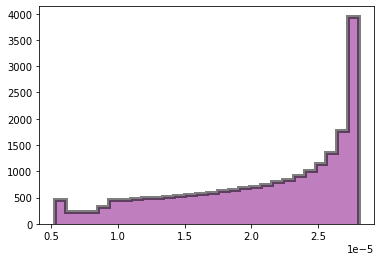

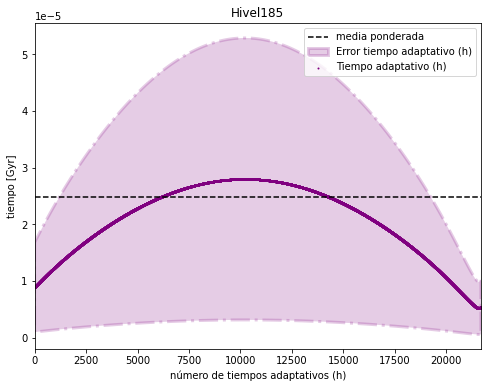

3.860220890835756e-05 5.2331471820989785e-06 27055


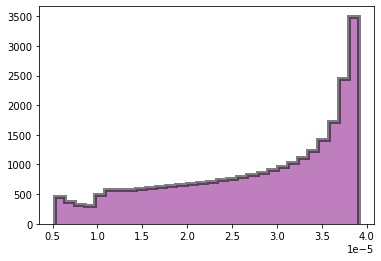

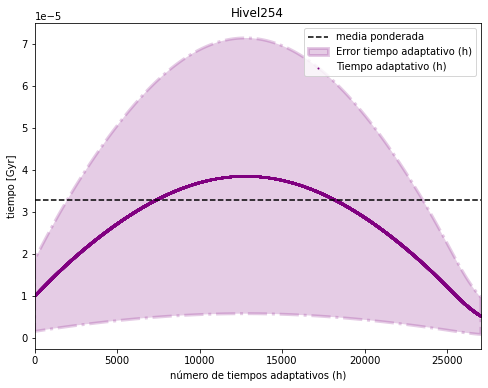

1.0295110348085887e-05 3.732610800849004e-06 10273


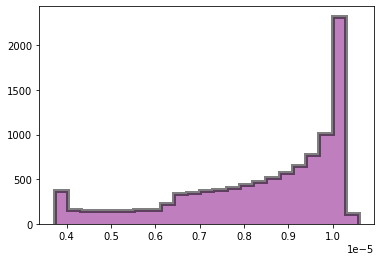

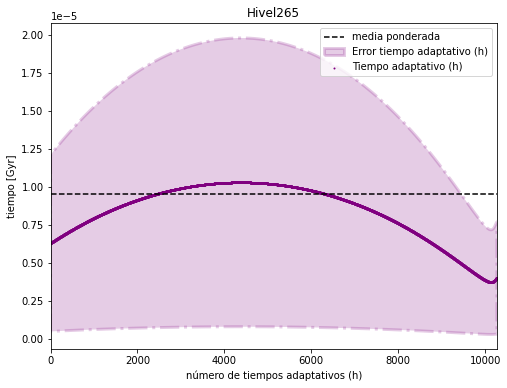

2.29364803206578e-05 4.483824110210887e-06 18711


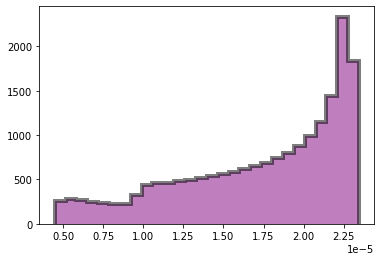

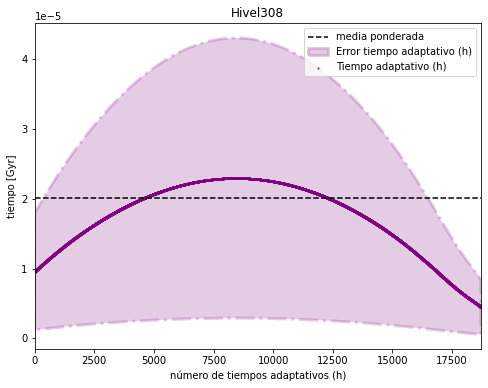

4.66972891565065e-05 5.390013807857672e-06 30487


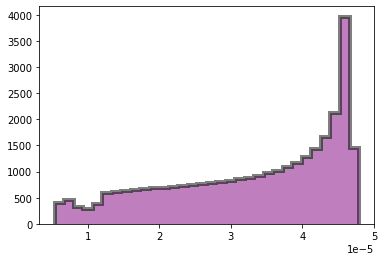

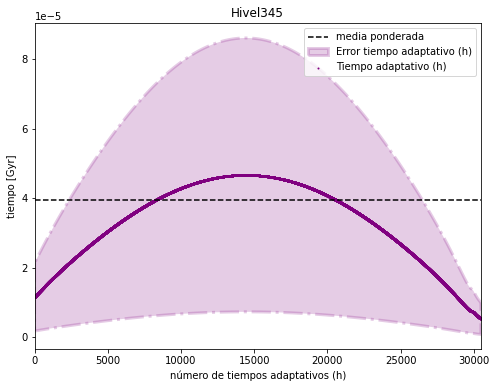

1.0034634942811012e-05 5.316869713512145e-06 1616


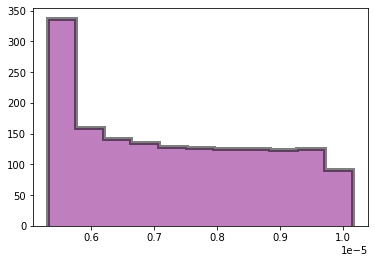

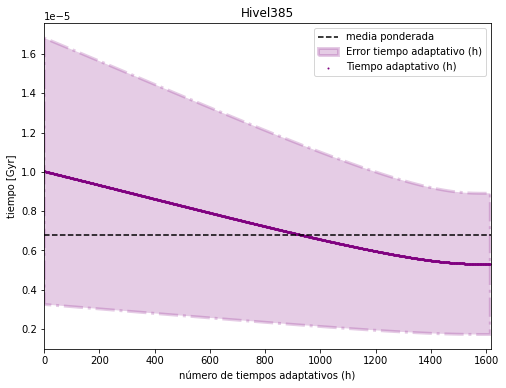

1.5185203992535642e-05 7.779134734931678e-06 1302


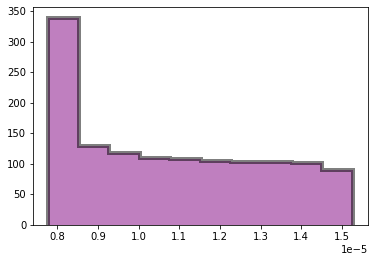

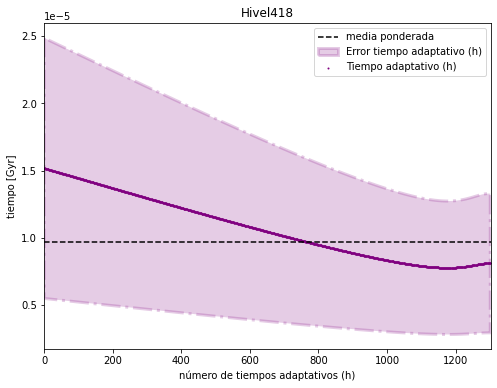

2.484123795463905e-05 4.775390759370217e-06 19380


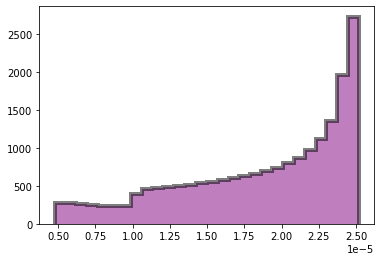

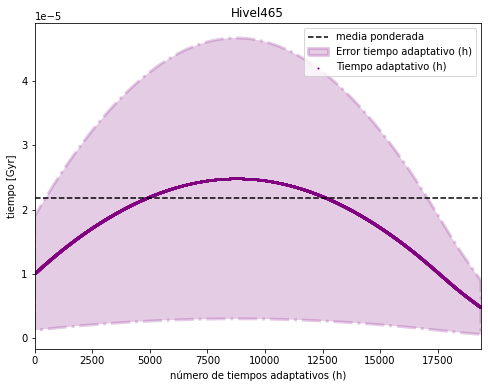

1.0085628946809483e-05 3.352069540504756e-06 10870


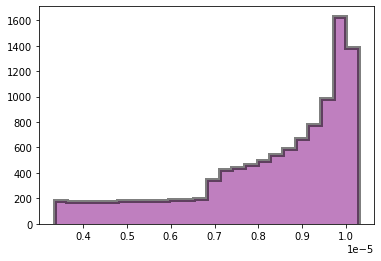

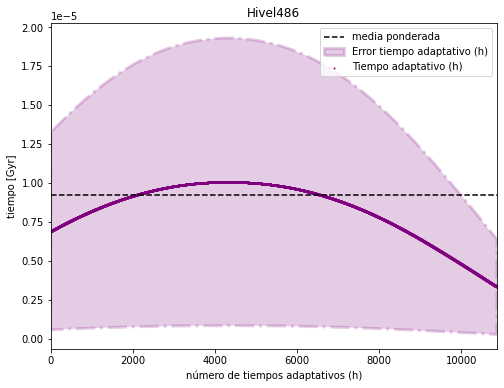

1.1132814834063109e-05 6.1723090966253205e-06 1609


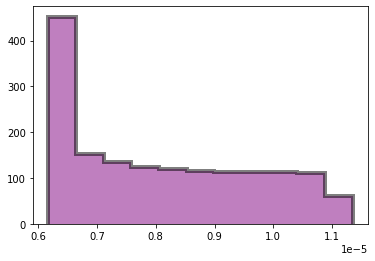

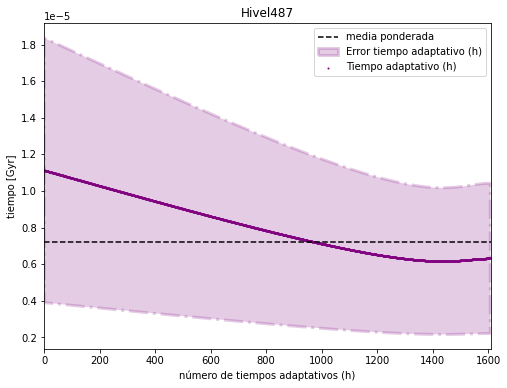

1.2030631525645251e-05 5.962962508904767e-06 1417


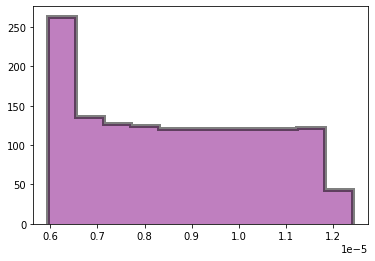

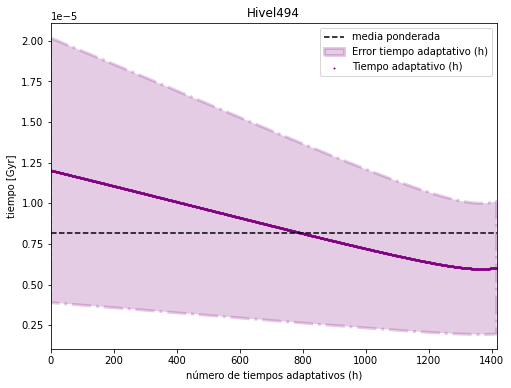

3.988819692919801e-05 5.363015857540236e-06 26677


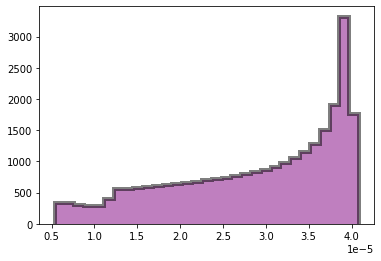

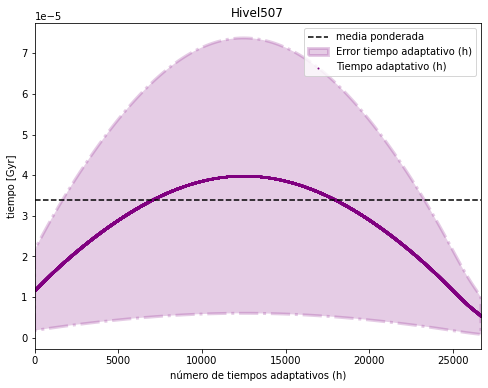

7.07366440065479e-06 3.228803725177733e-06 2548


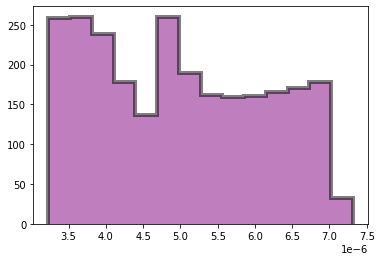

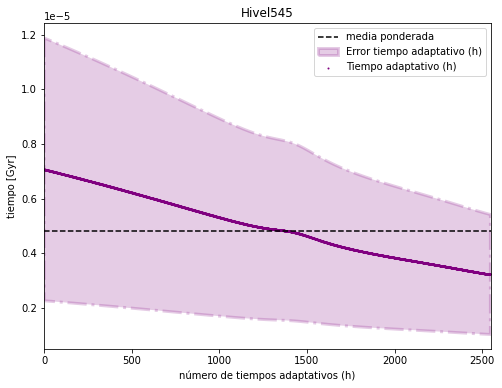

1.3066140661693146e-05 3.682438104100698e-06 12678


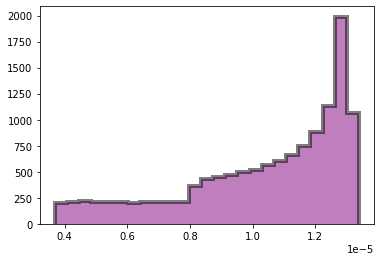

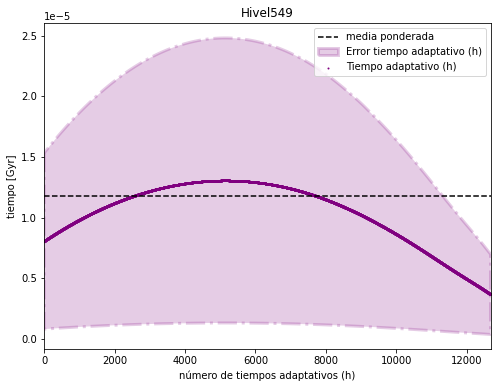

1.19930336389013e-05 5.318623241671127e-06 1651


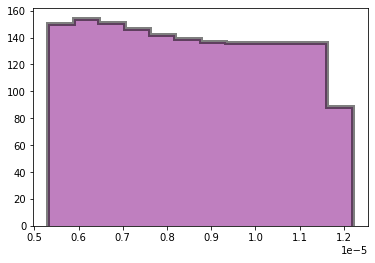

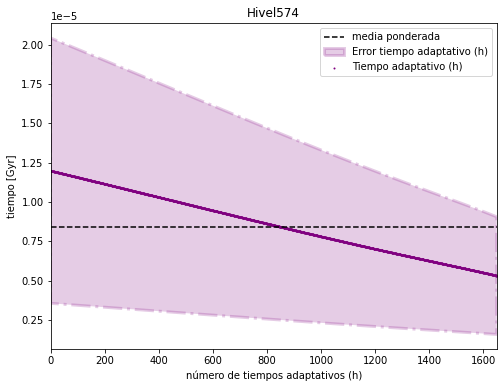

2.6016188282810803e-05 4.890000391271477e-06 19698


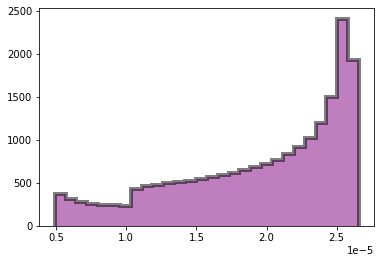

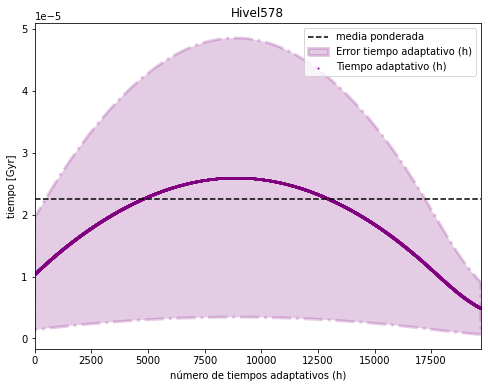

7.2676404946305426e-06 3.65784872373898e-06 2158


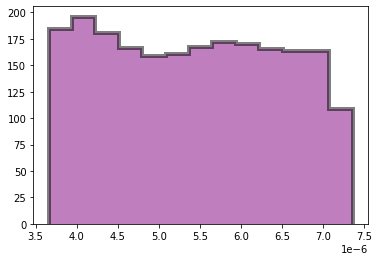

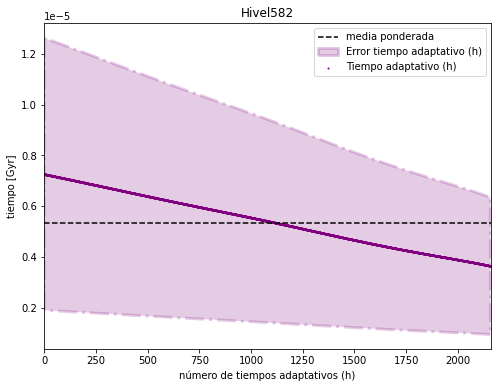

3.092638987376849e-05 5.859328686780685e-06 21840


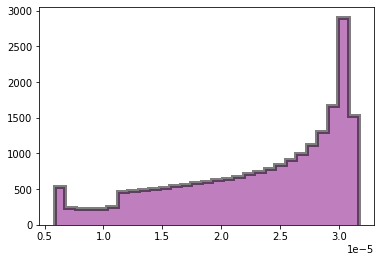

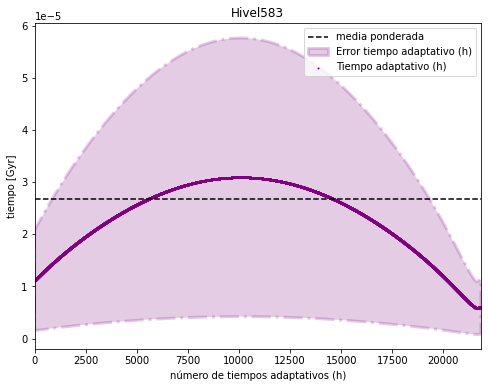

In [ ]:
#llamamos la función y hacemos las gráficas del error de h ponderado
for i in range(len(Star_names)):
  #print(i)
  error_h(Star_all[f'{i}']['time_adap(h)'][Star_all[f'{i}']['time_adap(h)']> 0.0])
  plt.title(f"{df.loc[i,'ID_Stars']}")
  plt.savefig(f"h_error_pond_{df.loc[i,'ID_Stars']}")
  plt.show()
  

#Ahora calculemos el otro error, uno más sencillo

In [ ]:
#Definimos la función graficadora de otro método para calcular el error sin media ponderada
def error_h_I(datos):
  hmax = np.max(datos)
  hmin = np.min(datos)
  x= [i for i in range(len(datos))] 
  y= datos
  delta_i = datos.values*datos.values/hmax
  fig, ax = plt.subplots(figsize=(10, 10))
  plt.axhline(np.mean(datos),color='k',linestyle="--", label = 'media')
  #plt.errorbar(x, datos, yerr= [datos - delta_i,datos + delta_i],linestyle='none', color='gold', label='Error asociado', alpha=0.5)
  plt.fill_between(x, datos - delta_i, datos + delta_i, color='pink', ls = '-.',lw= 3,alpha=1.0,edgecolor='black', label = 'Error tiempo adaptativo (h)')
  plt.xlim(0,len(datos))
  dispersion = ax.scatter(x, y,s = 2, color='crimson', label='Tiempo adaptativo (h)')
  print(hmax,hmin)
  plt.legend()

2.803522456377727e-05 0.0


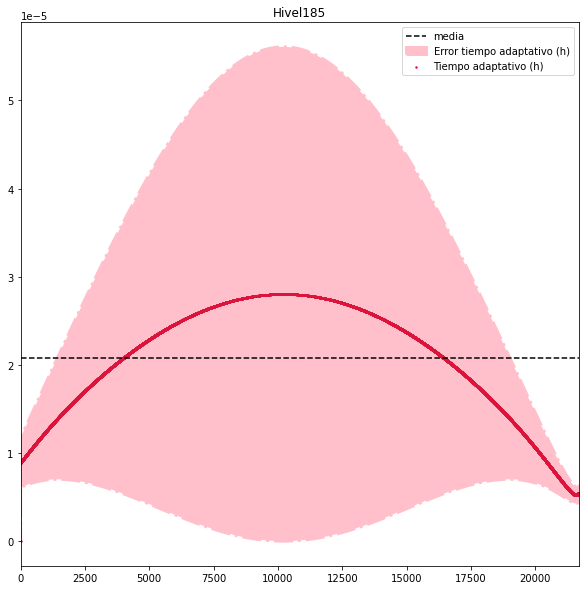

3.860220890835756e-05 0.0


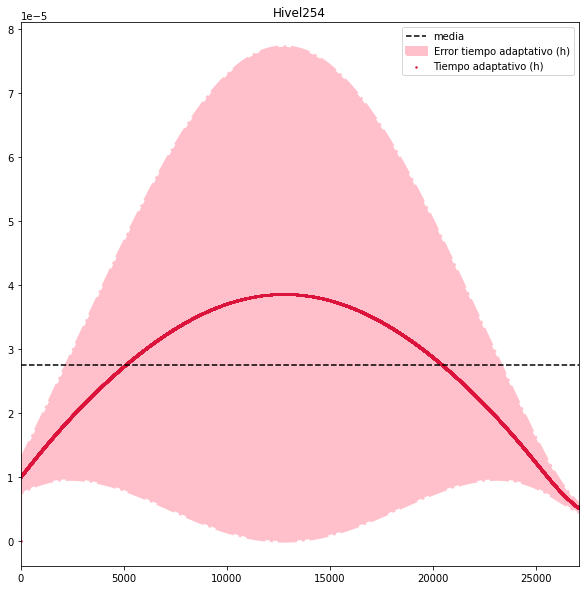

1.0295110348085887e-05 0.0


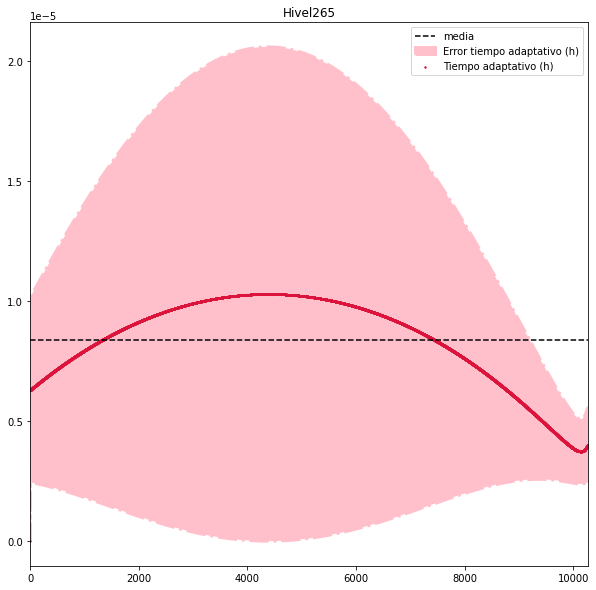

2.29364803206578e-05 0.0


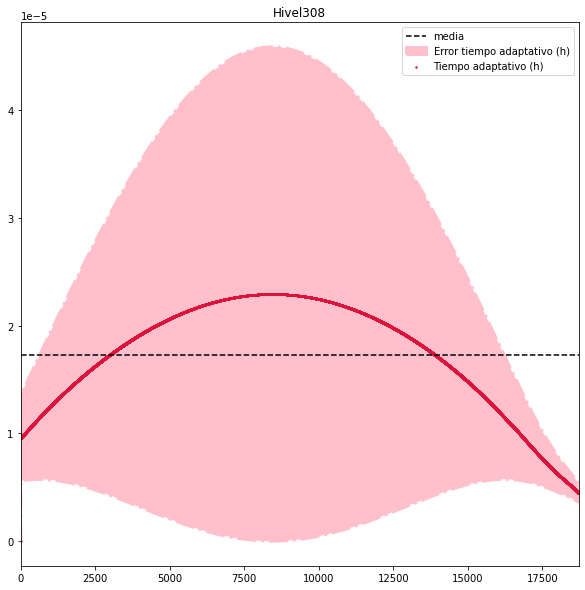

4.66972891565065e-05 0.0


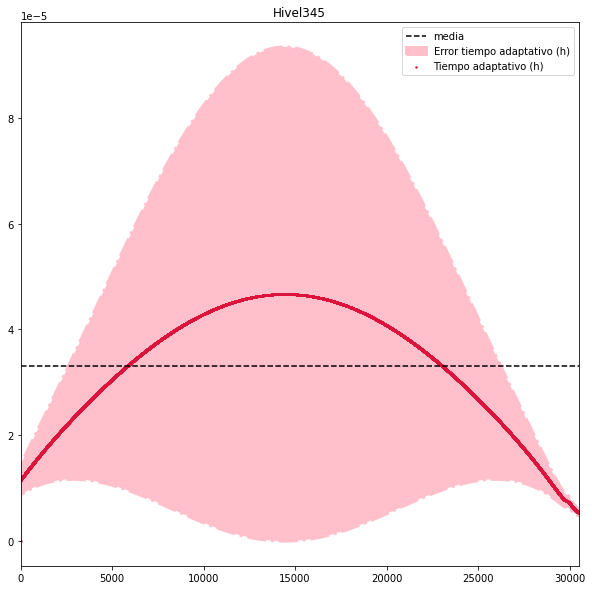

1.0034634942811012e-05 0.0


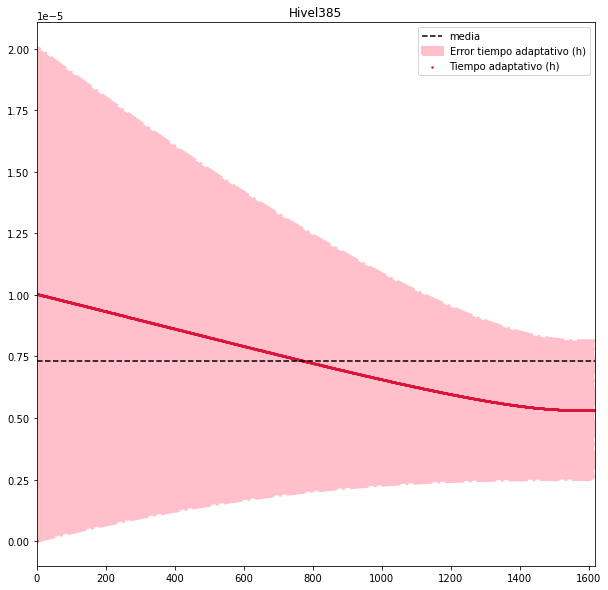

1.5185203992535642e-05 0.0


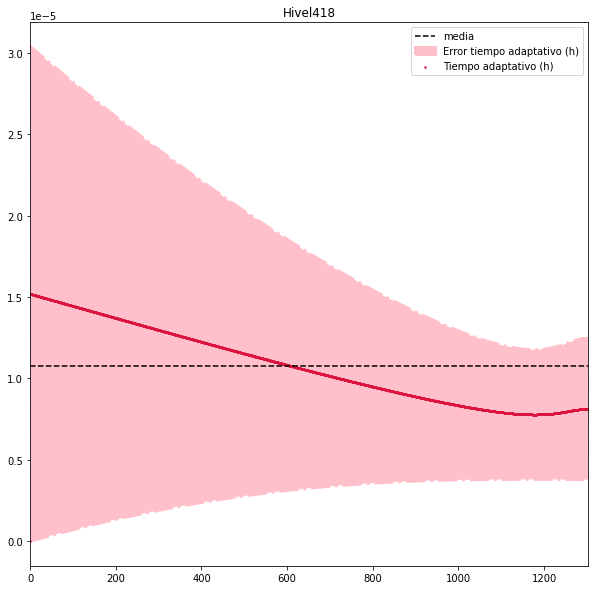

2.484123795463905e-05 0.0


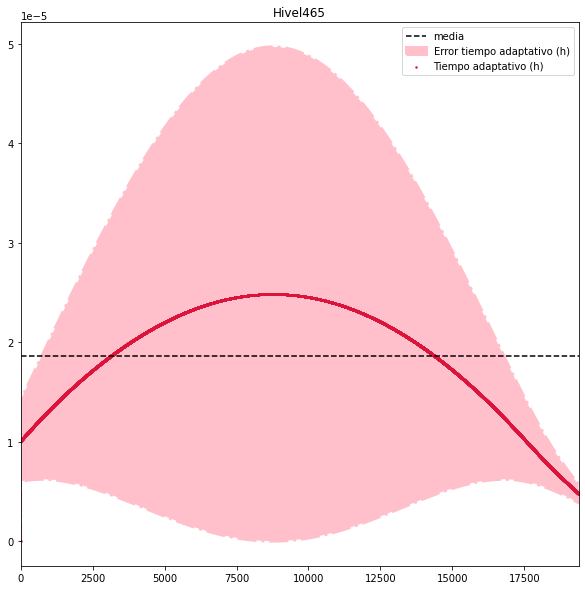

1.0085628946809483e-05 0.0


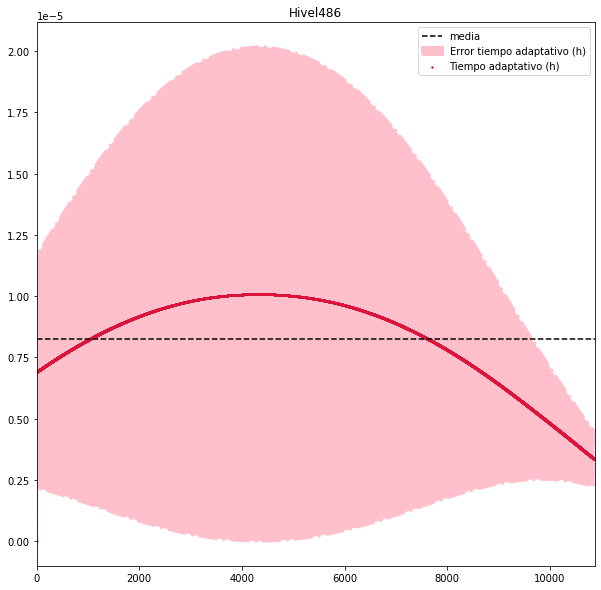

1.1132814834063109e-05 0.0


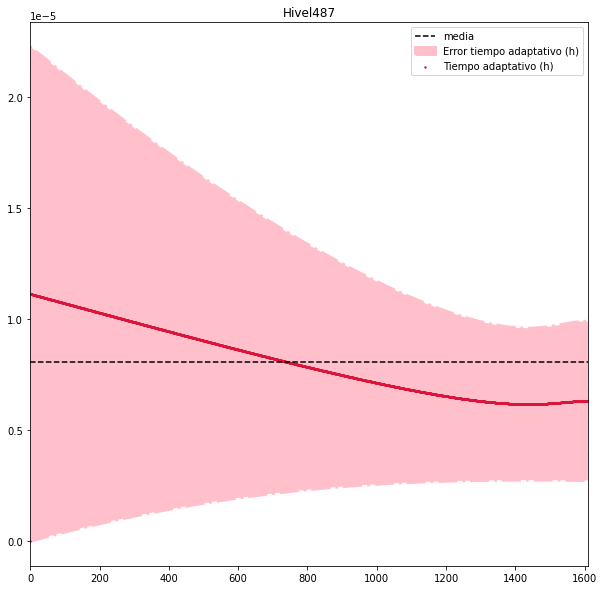

1.2030631525645251e-05 0.0


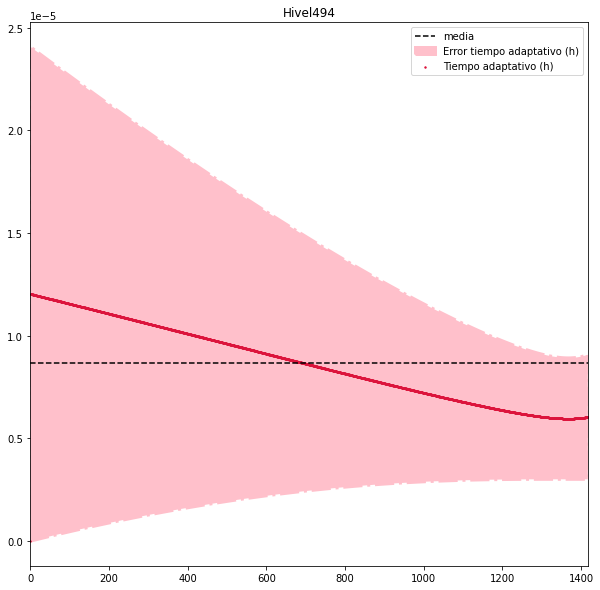

3.988819692919801e-05 0.0


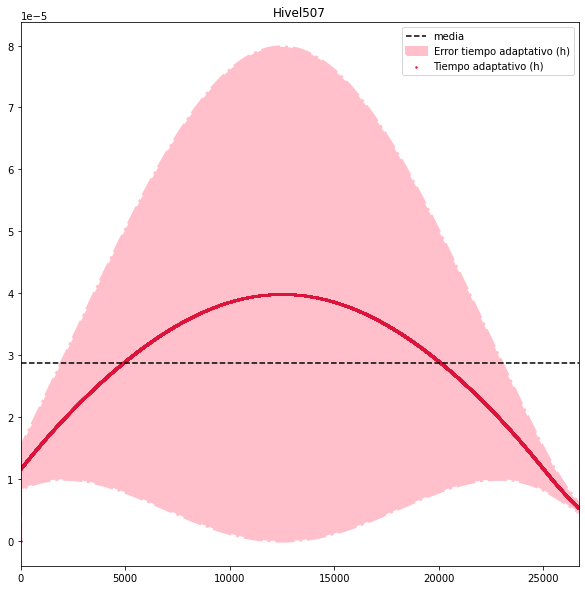

7.07366440065479e-06 0.0


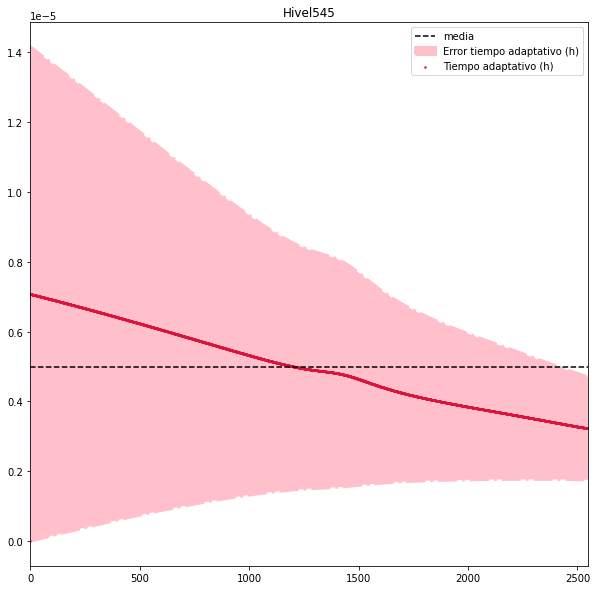

1.3066140661693146e-05 0.0


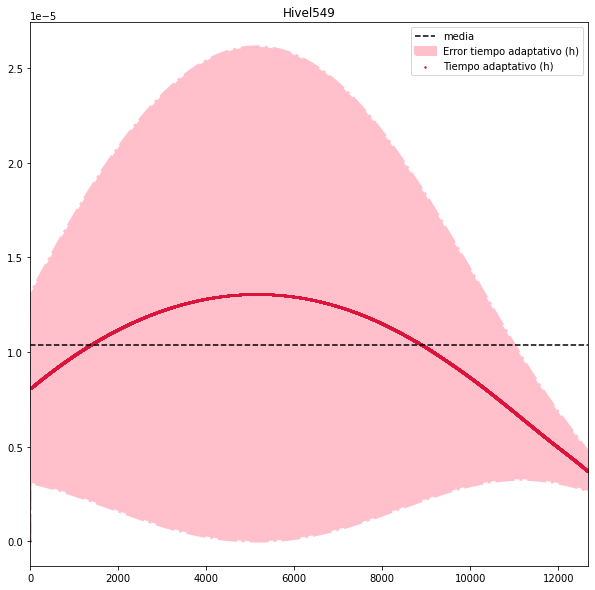

1.19930336389013e-05 0.0


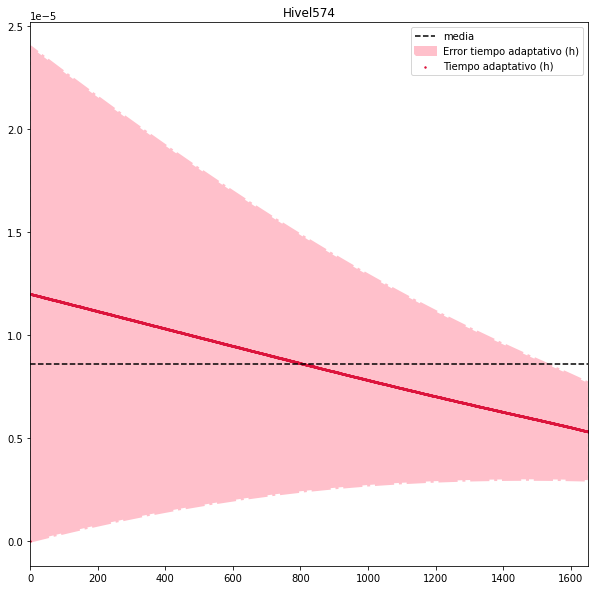

2.6016188282810803e-05 0.0


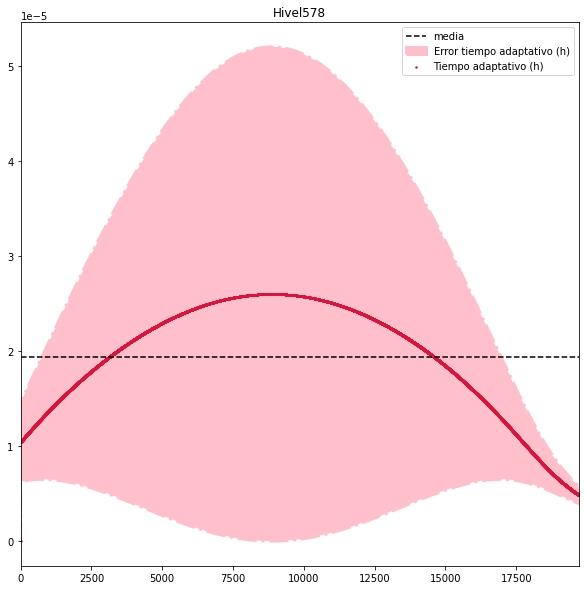

7.2676404946305426e-06 0.0


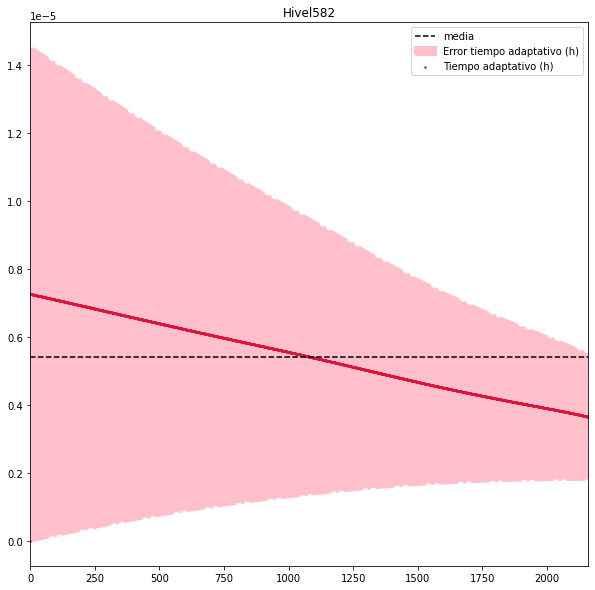

3.092638987376849e-05 0.0


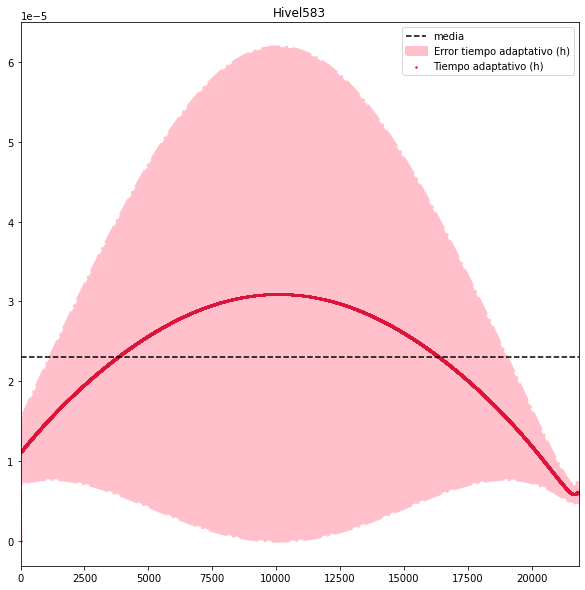

In [ ]:
for i in range(len(Star_names)):
  error_h_I(Star_all[f'{i}']['time_adap(h)'])
  plt.title(f"{df.loc[i,'ID_Stars']}")
  plt.savefig(f"h _error{df.loc[i,'ID_Stars']}")
  plt.show()